<a href="https://colab.research.google.com/github/kenny08gt/coursera-tensorflow-js/blob/main/Exercises/Exercise%208%20-%20Multiclass%20with%20Signs/Exercise%208%20-%20Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [3]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [3]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    content = np.loadtxt(filename, delimiter=',', unpack=True, skiprows=1)
#     print(content.shape)
    labels = content[0].T
    images = np.asarray(np.array_split(content[1:785], 28)).T
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"/content/sign_mnist_train.csv"
path_sign_mnist_test = f"/content/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3)


# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator( rescale = 1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    validation_split=0,
                                    fill_mode='nearest')

train_datagen.fit(training_images)

validation_datagen = ImageDataGenerator(rescale = 1.0/255.)
validation_datagen.fit(testing_images)

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [5]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'), 
    tf.keras.layers.Dense(units=26, activation=tf.nn.softmax)
])

# model.summary()
# training_labels = np.unique(training_labels)
# testing_labels = np.unique(testing_labels)

# Compile Model. 
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# from tensorflow.keras.utils import to_categorical
# y_binary = to_categorical(training_labels)

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32), 
                    epochs=10, 
                    steps_per_epoch=len(training_images) // 32,
                    validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                    verbose = 1)

model.evaluate(testing_images, testing_labels, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
857/857 [==============================] - 64s 37ms/step - loss: 2.3005 - accuracy: 0.3003 - val_loss: 0.7120 - val_accuracy: 0.7821
Epoch 2/10
857/857 [==============================] - 31s 36ms/step - loss: 1.0402 - accuracy: 0.6554 - val_loss: 0.4881 - val_accuracy: 0.8165
Epoch 3/10
857/857 [==============================] - 31s 37ms/step - loss: 0.6804 - accuracy: 0.7742 - val_loss: 0.2371 - val_accuracy: 0.9176
Epoch 4/10
857/857 [==============================] - 31s 36ms/step - loss: 0.5121 - accuracy: 0.8300 - val_loss: 0.1281 - val_accuracy: 0.9612
Epoch 5/10
857/857 [==============================] - 31s 37ms/step - loss: 0.4320 - accuracy: 0.8610 - val_loss: 0.1679 - val_accuracy: 0.9456
Epoch 6/10
857/857 [==============================] - 32s 37ms/step - loss: 0.3908 - accuracy: 0.8785 - val_loss: 0.1307 - val_accuracy: 0.9525
Epoch 7/10
857/857 [==============================] - 32s 37ms/step - loss: 0.3547 - accuracy: 0.8918 - val_loss: 0.0562 - val_accuracy:

[219.59701538085938, 0.8298940062522888]

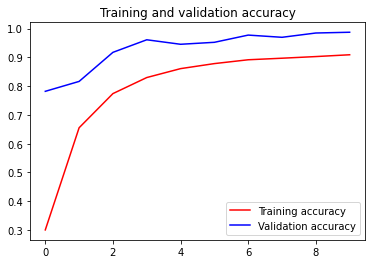

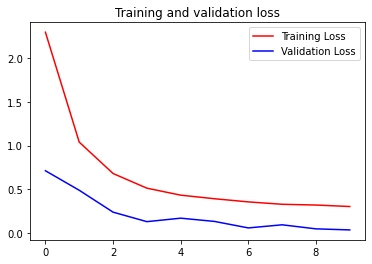

In [6]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()